## Загрузка файла с данными и изучение общей информации

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
from scipy import stats as st

In [2]:
games = pd.read_csv('/datasets/games.csv')

In [3]:
games.head(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [6]:
games.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [7]:
games.duplicated().sum()

0

### Вывод

Таблица содержит 16713 строк и 11 столбцов. В 6 столбцах имеются пропуски, более всего в столбцах `Critic_Score`, `User_Score` и `Rating`. Также видим необходимость заменить названия столбцов, т.к. они все начинаются с большой буквы. В таблице нет дубликатов.

## Подготовка данных

### Замена названий столбцов 

In [8]:
# т.к. нас не устраивает только регистр названий столбцов, 
# не будем их переименовавывать методом rename()
games.columns = games.columns.str.lower()
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Преобразование данных в нужные типы

In [9]:
display(games.head(), games.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


None

In [10]:
# столбец с оценкой критиков выглядит как целочисленный, проверим
games['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [11]:
# при замене типа данных в столбцу с оценкой пользователей
# вышла ошибка could not convert string to float: 'tbd'
# посмотрим на значения столбца
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Заменим `year_of_release` и `critic_score`  на целочисленный тип, а `user_score` на вещественый тип. 

Что касается "tbd", то это  аббревиатура от английского To Be Determined (будет определено). Скорее всего отзывов для данной игры нет или их недостаточно, чтобы выставить объективную оценку. В таблице "tbd" следует привести к Nan.

In [12]:
games[['year_of_release', 'critic_score']] = games[['year_of_release', 'critic_score']].astype('Int64')

In [13]:
games['user_score'] = games['user_score'].replace('tbd', np.NaN)
games['user_score'] = games['user_score'].astype('float')

In [14]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.4+ MB


### Обработка пропусков

In [15]:
games.isna().sum().sort_values(ascending=False)

user_score         9125
critic_score       8578
rating             6766
year_of_release     269
name                  2
genre                 2
platform              0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
dtype: int64

In [16]:
games.query('name.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,<NA>,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,<NA>,NaN,NaN


In [17]:
games.query('genre.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,<NA>,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,<NA>,NaN,NaN


Больше всего пропусков в столбцах с оценками пользователей и критиков. Заполнять значения средними или медианными некорректно, т.к. для каждой игры свои оценки и они никак не зависят от других игр. Нулями данные пропуски тоже не заполнить, т.к. по крайней мере, в столбце с оценкой пользователя есть реальная оценка 0. Исходя из этого, отсутствуют подходящие значения для замены пропусков. 

Значительное количество пропусков и в столбце с рейтингом. Но т.к. этот рейтинг присваевается конкретной организацией ESRB, может быть эти игры непопулярные и еще не были оценены этой организацией. Заменим пропуски на "no_esrb_rating".

Есть немного пропусков в столбце с годом релиза. Средние, медианные или константы не подходят для замены пропусков. Т.к. колчество незначительно, то пропуски не повлияют на результаты анализа. 

Также есть небольшое количество пропусков в столбцах с названием игры и жанром. Это одни и те же игры, но у них есть данные о продажах, которые нужны для анализа. Заполним их также как столбец с рейтингом на "no_name" и "no_genre".

In [18]:
games['rating'] = games['rating'].fillna('no_esrb_rating')
games['name'] = games['name'].fillna('no_name')
games['genre'] = games['genre'].fillna('no_genre')

In [19]:
games.isna().sum().sort_values(ascending=False)

user_score         9125
critic_score       8578
year_of_release     269
name                  0
platform              0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
rating                0
dtype: int64

### Посчёт суммарных продаж во всех регионах

In [20]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,no_esrb_rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,no_esrb_rating,31.38


### Вывод

Была проведена подготовка данных для дальнейшего анализа: заменены названия столбцов, некоторые столбцы были преобразованы в нужный тип данных, по возможности были заполнены пропуски. А также, были рассчитаны суммарные продажи по всем регионам и добавлены в отдельный столбец.

## Исследовательский анализ данных

### Количество игр, выпускавшихся в разные годы

<AxesSubplot:xlabel='year_of_release'>

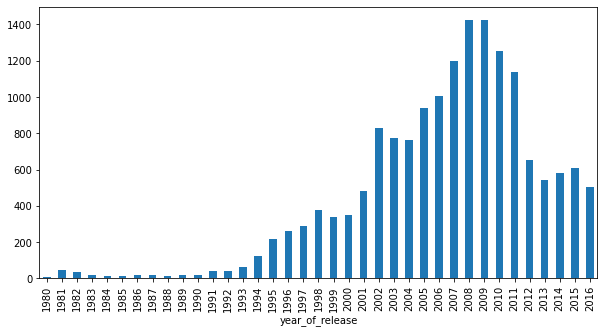

In [21]:
games.groupby('year_of_release')['year_of_release'].count().plot(kind='bar', figsize=(10, 5))

Видим, что до 1994 года, количество выпускаемых игр было незначительно. Далее наблюдаем устойчивый рост, пик которого достигает в 2008-2009 годах. В дальнейшем наблюдается спад.

### Изменения по продажам в зависимости от платформы

<AxesSubplot:xlabel='platform'>

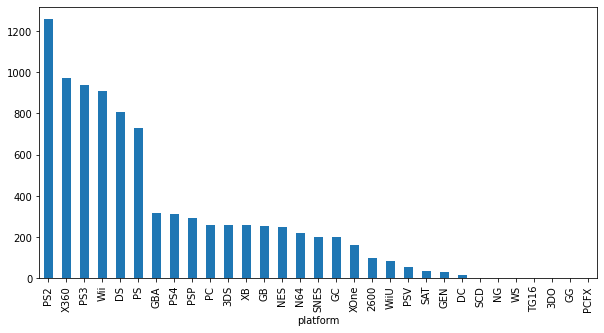

In [22]:
games.groupby('platform')['total_sales'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(10, 5))

Видим, что большинство игр выпускалось для платформы PS2. Но в целом, первые шесть платформ достаточно разительно отличаются остальных. Выделим их и проанализируем подробнее.

In [23]:
# выделим платформы в отдельную таблицу
top_6_platforms = (
    games
    .groupby('platform')['total_sales']
    .sum()
    .sort_values(ascending=False)
    .head(6)
)    
top_6_platforms

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
Name: total_sales, dtype: float64

In [24]:
# создадим сводную таблицу по продажам на платформах в год
# и передадим ей индексы интересующих нас платформ
sales_per_year = (
    games
    .pivot_table(index = 'year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum')
)    
sales_per_year = sales_per_year[top_6_platforms.index]
sales_per_year

platform,PS2,X360,PS3,Wii,DS,PS
year_of_release,,,,,,
1980,NaN,NaN,NaN,NaN,NaN,NaN
1981,NaN,NaN,NaN,NaN,NaN,NaN
1982,NaN,NaN,NaN,NaN,NaN,NaN
1983,NaN,NaN,NaN,NaN,NaN,NaN
1984,NaN,NaN,NaN,NaN,NaN,NaN
1985,NaN,NaN,NaN,NaN,0.02,NaN
1986,NaN,NaN,NaN,NaN,NaN,NaN
1987,NaN,NaN,NaN,NaN,NaN,NaN
1988,NaN,NaN,NaN,NaN,NaN,NaN


Text(0, 0.5, 'Количество проданных игр, млн. копий')

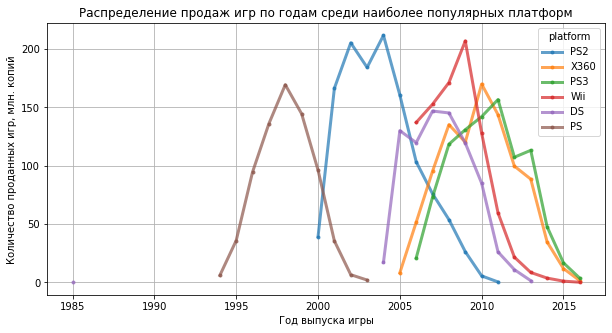

In [25]:
sales_per_year.plot(grid=True, alpha=0.7, figsize=(10, 5), style='.-', linewidth=3)
plt.title("Распределение продаж игр по годам среди наиболее популярных платформ")
plt.xlabel("Год выпуска игры")
plt.ylabel("Количество проданных игр, млн. копий")

Посмотрим, за какой характерный срок появляются и исчезают платформы:
* PS с 1994 по 2003;
* PS2 с 2000 по 2011;
* DS с 2004 по 2013;
* X360 с 2005 по 2016;
* Wii с 2006 по 2016;
* PS3 с 2006 по 2016.

Таким образом, средняя продолжительность существования платформы около 10 лет. Затем на смену приходит следующее поколение консолей с улучшенными характеристиками.

### Анализ продаж за актуальный период

In [26]:
new_games = games.query('year_of_release >= 2014')

In [27]:
platforms = new_games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
platforms

platform
PS4     288.15
XOne    140.36
3DS      86.68
PS3      68.18
X360     48.22
WiiU     42.98
PC       27.05
PSV      22.40
Wii       5.07
PSP       0.36
Name: total_sales, dtype: float64

In [28]:
sales_per_year = (
    new_games
    .pivot_table(index = 'year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum')
)
sales_per_year = sales_per_year[platforms.index]
sales_per_year

platform,PS4,XOne,3DS,PS3,X360,WiiU,PC,PSV,Wii,PSP
year_of_release,,,,,,,,,,
2014,100.00,54.07,43.76,47.76,34.74,22.03,13.28,11.90,3.75,0.24
2015,118.90,60.14,27.78,16.82,11.96,16.35,8.52,6.25,1.14,0.12
2016,69.25,26.15,15.14,3.60,1.52,4.60,5.25,4.25,0.18,NaN


<AxesSubplot:xlabel='year_of_release'>

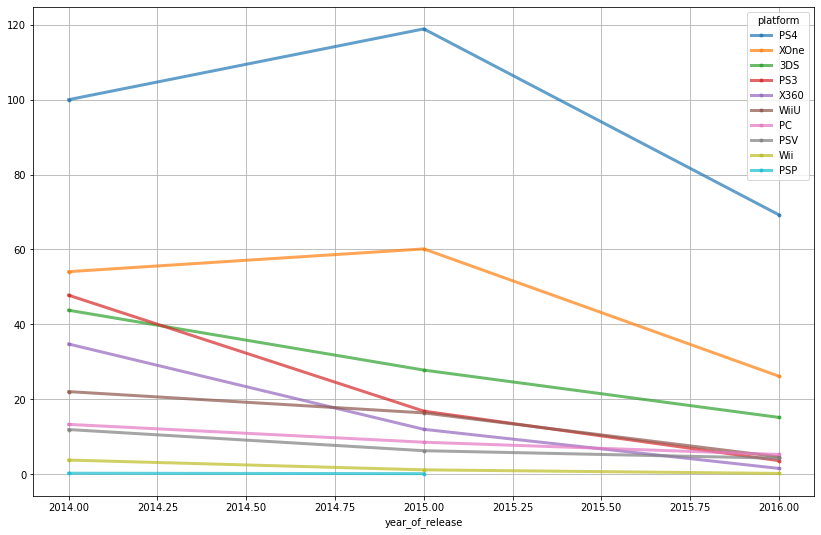

In [29]:
sales_per_year.plot(grid=True, alpha=0.7, figsize=(14, 9), style='.-', linewidth=3)

На графике видно, что все платформы к 2016 году показали падение. Среди лидеров по продажам можно отметить PS4, XOne и 3DS. Выделим их как потенциально прибыльные платформы.

### Диаграммы размаха 

In [30]:
new_games['total_sales'].describe()

count    1689.000000
mean        0.431883
std         1.056109
min         0.010000
25%         0.030000
50%         0.100000
75%         0.350000
max        14.630000
Name: total_sales, dtype: float64

<AxesSubplot:>

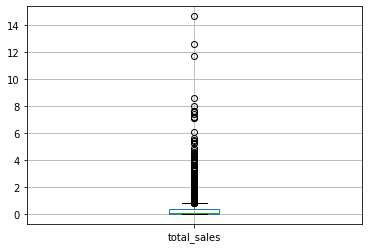

In [31]:
new_games.boxplot(column='total_sales')

(0.0, 1.5)

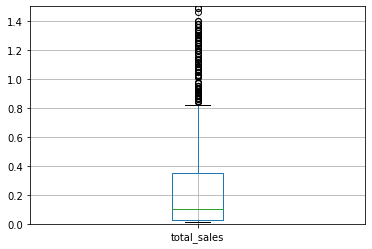

In [32]:
new_games.boxplot(column='total_sales').set_ylim(0, 1.5)

Нормальные значения всех продаж доходят до 810 тыс. копий. Медиана находится на значении около 100 тыс. копий.

In [33]:
top_3 = (new_games[(new_games['platform'] == 'PS4') | 
                   (new_games['platform'] == 'XOne') | 
                   (new_games['platform'] == '3DS')].reset_index())

Text(0, 0.5, 'Количество проданных игр, млн. копий')

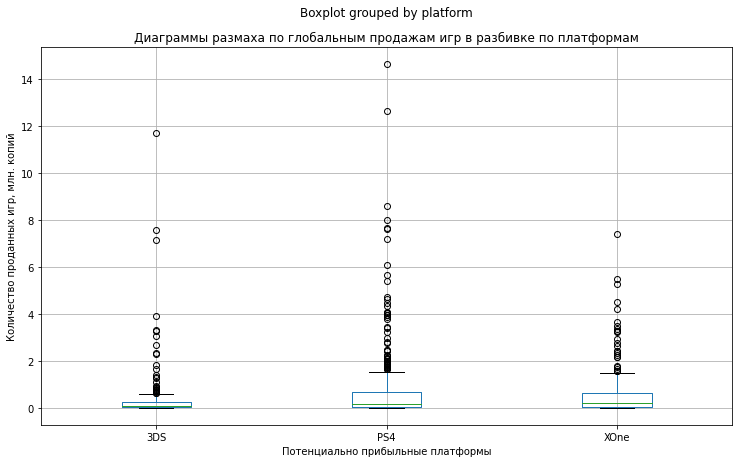

In [34]:
top_3.boxplot(column = 'total_sales', by='platform', figsize=(12, 7))
plt.title('Диаграммы размаха по глобальным продажам игр в разбивке по платформам')
plt.xlabel("Потенциально прибыльные платформы")
plt.ylabel("Количество проданных игр, млн. копий")

Text(0, 0.5, 'Количество проданных игр, млн. копий')

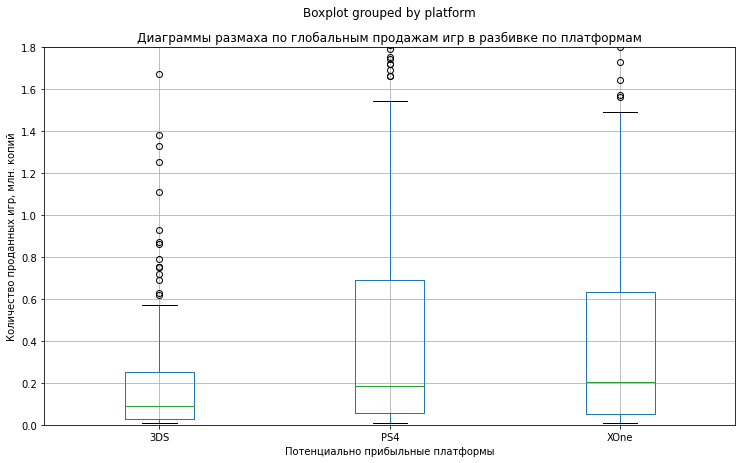

In [35]:
top_3.boxplot(column = 'total_sales', by='platform', figsize=(12, 7)).set_ylim(0, 1.8)
plt.title('Диаграммы размаха по глобальным продажам игр в разбивке по платформам')
plt.xlabel("Потенциально прибыльные платформы")
plt.ylabel("Количество проданных игр, млн. копий")

Медианные значения проданных копий для платформы 3DS составляют около 100 тыс. копий, PS4 - около 200 тыс. копий, а XOne - 200 тыс копий. Нормальные значения продаж ограничиваются 590 тыс. копий для платформы 3DS, около 1,55 млн. копий для платформы PS4 и около 1,5 млн. копий для XOne.

### Влияние оценок пользователей и критиков на продажи внутри платформы

Text(0, 0.5, 'Количество проданных игр, млн. копий')

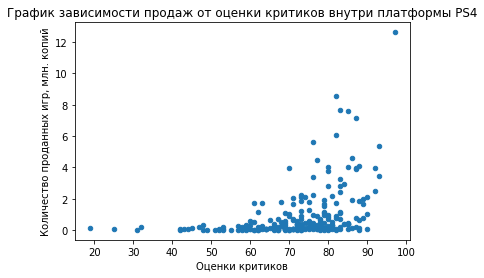

In [36]:
top_3.query('platform == "PS4"').plot(x='critic_score', y='total_sales', kind='scatter')
plt.title('График зависимости продаж от оценки критиков внутри платформы PS4')
plt.xlabel("Оценки критиков")
plt.ylabel("Количество проданных игр, млн. копий")

Text(0, 0.5, 'Количество проданных игр, млн. копий')

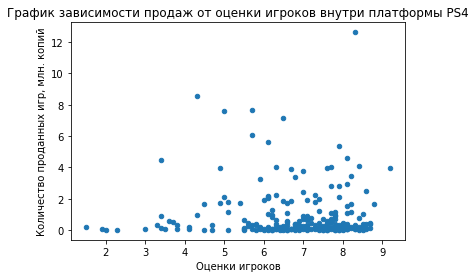

In [37]:
top_3.query('platform == "PS4"').plot(x='user_score', y='total_sales', kind='scatter')
plt.title('График зависимости продаж от оценки игроков внутри платформы PS4')
plt.xlabel("Оценки игроков")
plt.ylabel("Количество проданных игр, млн. копий")

In [38]:
top_3.query('platform == "PS4"')[['total_sales', 'critic_score', 'user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.402661,-0.040132
critic_score,0.402661,1.000000,0.546434
user_score,-0.040132,0.546434,1.000000


Для платформы PS4 на графике видим положительную корреляцию между продажами и оценкой критиков. На это указывает и коэффициент корреляции в 0,4, что говорит о слабой взаимосвязи. Что касается оценок игроков, то существенной взаимосвязи не замечано.

Text(0, 0.5, 'Количество проданных игр, млн. копий')

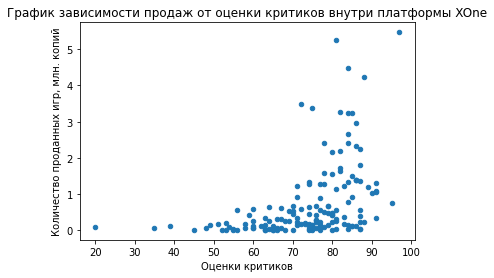

In [39]:
top_3.query('platform == "XOne"').plot(x='critic_score', y='total_sales', kind='scatter')
plt.title('График зависимости продаж от оценки критиков внутри платформы XOne')
plt.xlabel("Оценки критиков")
plt.ylabel("Количество проданных игр, млн. копий")

Text(0, 0.5, 'Количество проданных игр, млн. копий')

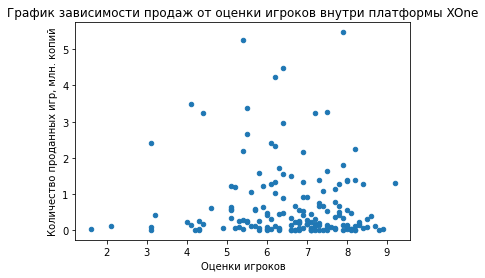

In [40]:
top_3.query('platform == "XOne"').plot(x='user_score', y='total_sales', kind='scatter')
plt.title('График зависимости продаж от оценки игроков внутри платформы XOne')
plt.xlabel("Оценки игроков")
plt.ylabel("Количество проданных игр, млн. копий")

In [41]:
top_3.query('platform == "XOne"')[['total_sales', 'critic_score', 'user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.428677,-0.070384
critic_score,0.428677,1.000000,0.440977
user_score,-0.070384,0.440977,1.000000


Также как и для платформы PS4, на платформе XOne есть слабая взаимосязь между продажами и оценкой критиков, на что указывает коэффициент корреляции в 0,43. Между продажами и оценкой игроков взаимосвязи нет.

Text(0, 0.5, 'Количество проданных игр, млн. копий')

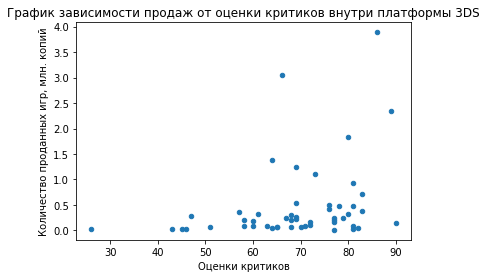

In [42]:
top_3.query('platform == "3DS"').plot(x='critic_score', y='total_sales', kind='scatter')
plt.title('График зависимости продаж от оценки критиков внутри платформы 3DS')
plt.xlabel("Оценки критиков")
plt.ylabel("Количество проданных игр, млн. копий")

Text(0, 0.5, 'Количество проданных игр, млн. копий')

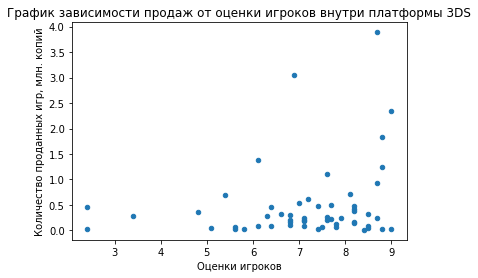

In [43]:
top_3.query('platform == "3DS"').plot(x='user_score', y='total_sales', kind='scatter')
plt.title('График зависимости продаж от оценки игроков внутри платформы 3DS')
plt.xlabel("Оценки игроков")
plt.ylabel("Количество проданных игр, млн. копий")

In [44]:
top_3.query('platform == "3DS"')[['total_sales', 'critic_score', 'user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.314117,0.215193
critic_score,0.314117,1.000000,0.862485
user_score,0.215193,0.862485,1.000000


Платформа 3DS схожа с предыдущими в коэффициентах корреляции между продажами и оценками критиков (коэффициент составляет 3,14). Однако здесь также имеет место быть слабая взаимосвязь между продажами и оценками игроков, на что указывает коэффициент корреляции в 0,22, в отличие от предудущих платформ, где этой взаимосвязи не было.

### Общее распределение игр по жанрам

Text(0, 0.5, 'Количество проданных игр, шт')

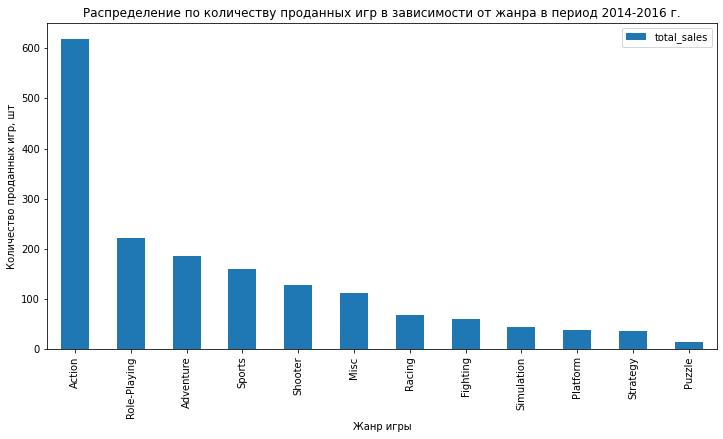

In [45]:
genre = (new_games
         .pivot_table(index='genre', values='total_sales', aggfunc='count')
         .sort_values(by = 'total_sales', ascending=False)
)

genre.plot(kind='bar', figsize=(12, 6))
plt.title('Распределение по количеству проданных игр в зависимости от жанра в период 2014-2016 г.')
plt.xlabel("Жанр игры")
plt.ylabel("Количество проданных игр, шт")

Text(0, 0.5, 'Медианные продажи, млн. копий')

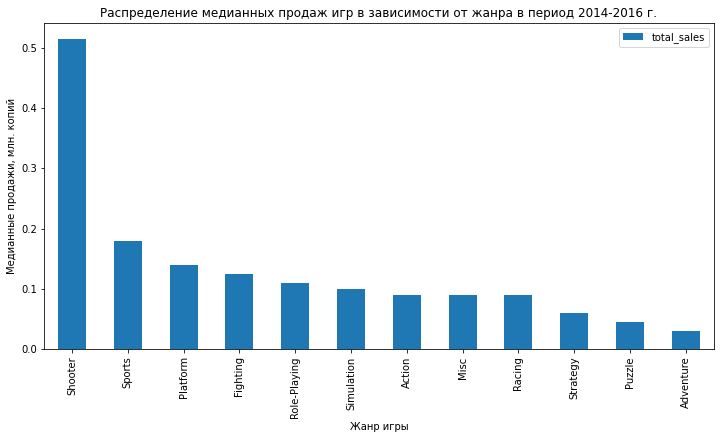

In [46]:
genre = (new_games
         .pivot_table(index='genre', values='total_sales', aggfunc='median')
         .sort_values(by = 'total_sales', ascending=False)
)

genre.plot(kind='bar', figsize=(12, 6))
plt.title('Распределение медианных продаж игр в зависимости от жанра в период 2014-2016 г.')
plt.xlabel("Жанр игры")
plt.ylabel("Медианные продажи, млн. копий")

Медианный показатель выделил жанр Шутер в качестве явного лидера среди продаж. Если говорить о количестве проданных игр, то выделяется жанр Экшн.

### Вывод

Был проведен исследовательский анализ данных, в ходе которого был выявлен характерный период существования платформ, а также выделен актуальный период для дальнейшего анализа. Далее были опередены потенциально прибыльные платформы и нормальные значения продаж для каждой из них. А также было рассмотрено влияние оценок критиков и игроков на в продажи на каждой из платформ.

## Составление портрета пользователя по каждому региону

### Самые популярные платформы

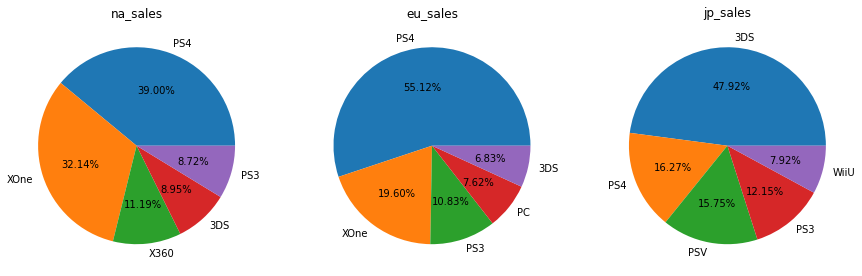

In [47]:
countries = ['na_sales', 'eu_sales', 'jp_sales']
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i in range (3):
    res = (new_games
           .groupby('platform')[countries[i]]
           .sum()
           .reset_index()
           .sort_values(countries[i], ascending=False, ignore_index=True)
           .head(5))
    axs[i].pie(res[countries[i]], labels=res['platform'], autopct='%1.2f%%')
    axs[i].set_title(countries[i])

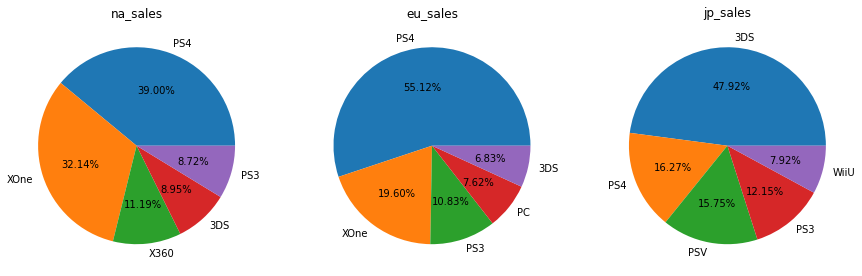

In [48]:
countries = ['na_sales', 'eu_sales', 'jp_sales']
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i in range (3):
    res = (new_games
           .groupby('platform')[countries[i]]
           .sum()
           .reset_index()
           .sort_values(countries[i], ascending=False, ignore_index=True)
           .head(5))
    axs[i].pie(res[countries[i]], labels=res['platform'], autopct='%1.2f%%')
    axs[i].set_title(countries[i])

В Северной Америке более всего распространены игры для платформы PS4. Далее расположились платформы XOne и X360. Это может быть связано с тем, что Xbox их отечественный производитель. Разница между первым и вторым и местом приблизительно 7%.

В Европе на первом месте также стоит японская PS4 и занимает больше половины рынка. Второе и третье место занимают платформы XOne и PS3.

В Японии же первое место занимает платформа 3DS, что составляет почти половину рынка. Далее, второе место занимает PS4 и третье - PSV. Разница в долях между вторым и третьем местом незначительная (менее 1%).

### Самые популярные жанры

Text(0.5, 1.0, 'ТОП-5 жанров игр по продажам в Северной Америке')

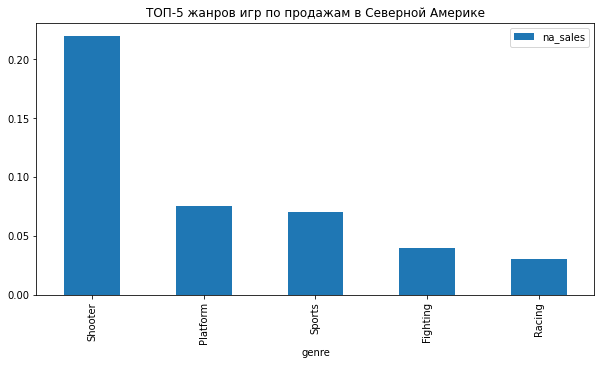

In [49]:
(new_games
 .pivot_table(index='genre', values = 'na_sales', aggfunc='median')
 .sort_values(by='na_sales', ascending=False)
 .head(5)
 .plot(kind='bar', subplots=True, figsize=(10, 5))
)
plt.title('ТОП-5 жанров игр по продажам в Северной Америке')

Text(0.5, 1.0, 'ТОП-5 жанров игр по продажам в Европе')

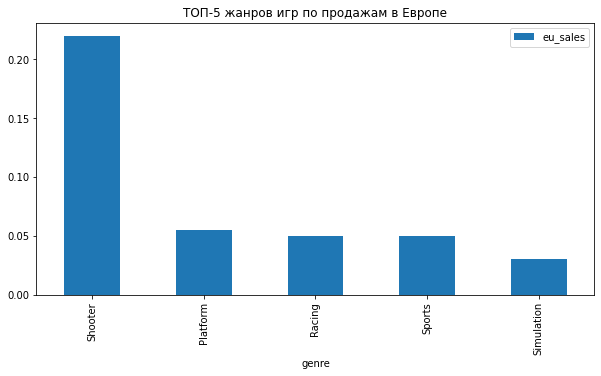

In [50]:
(new_games
 .pivot_table(index='genre', values = 'eu_sales', aggfunc='median')
 .sort_values(by='eu_sales', ascending=False)
 .head(5)
 .plot(kind='bar', subplots=True, figsize=(10, 5))
)
plt.title('ТОП-5 жанров игр по продажам в Европе')

Text(0.5, 1.0, 'ТОП-5 жанров игр по продажам в Японии')

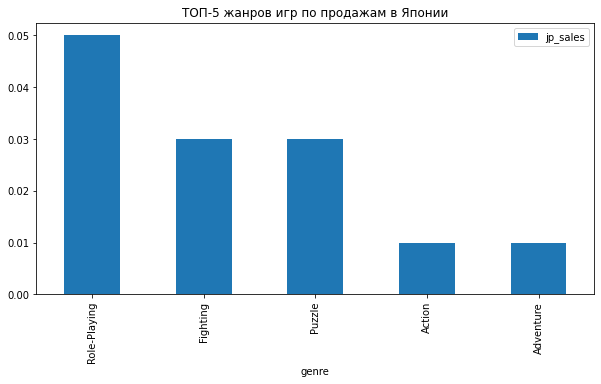

In [51]:
(new_games
 .pivot_table(index='genre', values = 'jp_sales', aggfunc='median')
 .sort_values(by='jp_sales', ascending=False)
 .head(5)
 .plot(kind='bar', subplots=True, figsize=(10, 5))
)
plt.title('ТОП-5 жанров игр по продажам в Японии')

В Северной Америке и Европе схожая картина: первое место с большим отрывом занимает жанр Shooter.

Япония отличается от других регионов. Здесь на первом месте идет жанр Role-Playing. Погуглив, узнаю, что действительно ролевые игры в Японии очень распространены и даже есть отдельный поджанр игр JRPG (японская ролевая игра).

### Влияние рейтинга ESRB на продажи в регионе

In [52]:
new_games['rating'].value_counts()

no_esrb_rating    749
T                 271
M                 265
E                 219
E10+              185
Name: rating, dtype: int64

In [53]:
def rating_rus(rating):
    if rating == 'no_esrb_rating':
        return 'Нет рейтинга'
    if rating == 'T':
        return '13+'
    if rating == 'M':
        return '17+'
    if rating == 'E':
        return 'Для всех'
    if rating == 'E10+':
        return '10+'

In [54]:
new_games['rating_rus'] = new_games['rating'].apply(rating_rus)
new_games['rating_rus'].value_counts()

Нет рейтинга    749
13+             271
17+             265
Для всех        219
10+             185
Name: rating_rus, dtype: int64

Text(0.5, 1.0, 'Распределение продаж по ESRB рейтингу в Северной Америке')

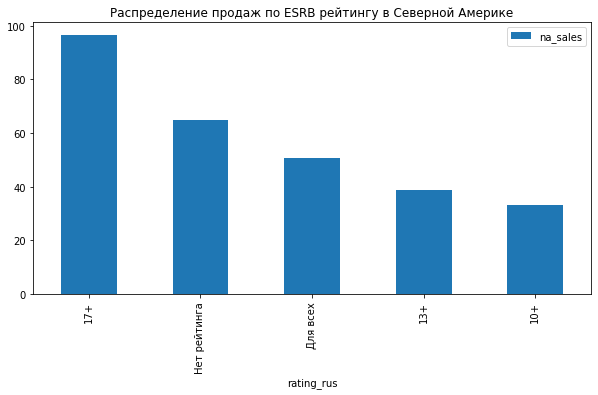

In [55]:
(new_games
 .pivot_table(index='rating_rus', values = 'na_sales', aggfunc='sum')
 .sort_values(by='na_sales', ascending=False)
 .head(5)
 .plot(kind='bar', subplots=True, figsize=(10, 5))
)
plt.title('Распределение продаж по ESRB рейтингу в Северной Америке')

Text(0.5, 1.0, 'Распределение продаж по ESRB рейтингу в Европе')

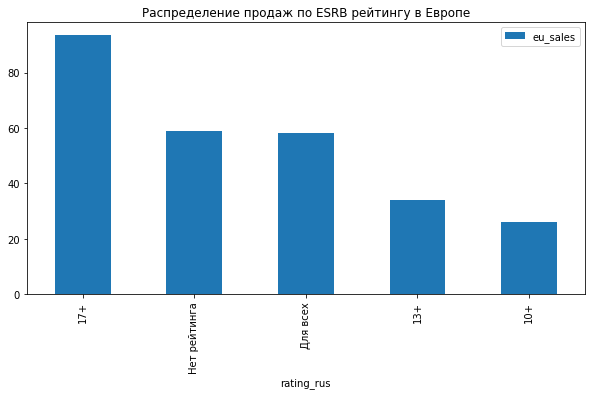

In [56]:
(new_games
 .pivot_table(index='rating_rus', values = 'eu_sales', aggfunc='sum')
 .sort_values(by='eu_sales', ascending=False)
 .head(5)
 .plot(kind='bar', subplots=True, figsize=(10, 5))
)
plt.title('Распределение продаж по ESRB рейтингу в Европе')

Text(0.5, 1.0, 'Распределение продаж по ESRB рейтингу в Японии')

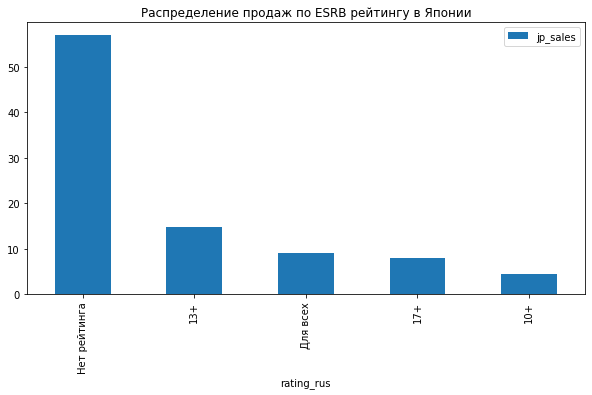

In [57]:
(new_games
 .pivot_table(index='rating_rus', values = 'jp_sales', aggfunc='sum')
 .sort_values(by='jp_sales', ascending=False)
 .head(5)
 .plot(kind='bar', subplots=True, figsize=(10, 5))
)
plt.title('Распределение продаж по ESRB рейтингу в Японии')

В Северной Америке и Европе рейтинг оказывает влияние на продажи. Здесь на первом месте идут игры для взрослых, материалы игры не подходят для подростков младше 17 лет.
Однако в Японии на первом месте по продажам стоят игры, неразмеченные оранизацией ESRB, соответвенно влияние на продажи рейтинг не оказывает.

### Вывод

В этом пункте были рассмотрены три основных региона: Северная Америка, Европа и Япония. Анализ проводился в разрезе наиболее популярных платформ, жанров, а также влияния рейтинга ESRB на продажи в каждом из регионов. В ходе анализа было выявлено, что Европа и Северная Америка во многом схожи, а Япония имеет существенные отличия.

## Проверка гипотез

### Гипотеза 1

In [58]:
xone = new_games.query('platform == "XOne"')['user_score'].dropna()
len(xone)                     

165

In [59]:
pc = new_games.query('platform == "PC"')['user_score'].dropna()
len(pc)

122

У нас имеются две достаточно большие выборки, а значит выборочные средние распределены нормально. Достаточно большими считаются выборки более 30 элементов.  Будем проверять гипотезу о равенстве средних двух генеральных совокупностей, при условии, что выборки не зависят друг от друга. Т.к. выборки разного размера, предроложим, что дисперсии генеральных совокупностей не равны. Для проверки будем применять t-тест.
Нулевая гипотеза всегда содержит знак равенства. Сформулируем нулевую и альтернативную гипотезу:
* H0: Средние пользовательские рейтинги платформ Xbox One и PC равны;
* H1: Средние пользовательские рейтинги платформ Xbox One и PC не равны.

In [60]:
# зададим критический уровень значимости
alpha = 0.05

In [61]:
results = st.ttest_ind(xone, pc, equal_var = False)

In [62]:
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


Проверка показала, что средние пользовательские рейтинги на платформах Xbox One и PC не отличаются.

### Гипотеза 2

In [63]:
action = new_games.query('genre == "Action"')['user_score'].dropna()
len(action)

297

In [64]:
sports = new_games.query('genre == "Sports"')['user_score'].dropna()
len(sports)

127

Будем также проверять гипотезу о равенстве средних. Сформулируем нулевую и альтернативную гипотезы:
* H0: Средние пользовательские рейтинги жанров Action и Sports равны;
* H1: Средние пользовательские рейтинги жанров Action и Sports не равны.

In [65]:
results_2 = st.ttest_ind(action, sports, equal_var = False)

In [66]:
# оставим критический уровень значимости прежним
print('p-значение:', results_2.pvalue)

if (results_2.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


Проверка показала, что средние пользовательские рейтинги жанров Action и Sports отличаются.

## Общий вывод

Было проведено исследование продаж компьютерных игр в интернет магазине. На момент 2016 года отмечается общий спад в продажах по всем платформам. Это может быть связано с тем, что все консоли имеют свои собственные сервисы цифровой дистрибьюции (магазины) и игрокам удобнее покупать прямо из консоли, а для платформы ПК есть крупнейший Steam. А также рынок развивается в сторону мобильных игр.

Из проведенного анализа мы узнали, что характерный период существования платформы около 10 лет. Затем на смену приходит следующее поколение консолей с улучшенными характеристиками. Для анализа был выбран период с 2014 года по 2016 год. В ходе анализа были выявлены потенциально прибыльные платформы: PS4, XOne и 3DS.

На продажи в Северной Америке и Европе больше всего влияют оценки критиков, в том время как в Японии покупатели учитывают оценки и критиков, и игроков.

При составлении портрета пользователя было выявлено, что рынок продаж компьютерных игр в Северной Америке и Европе во многом схож, в то время как в Японии имеются существенные отличия.

Самыми популярными платформами за исследуемый период стали:
* В Северной Америке - PS4, XOne, X360, 3DS, PS3;
* В Европе - PS4, XOne, PS3, PC, 3DS;
* В Японии - 3DS, PS4, PSV, PS3, WiiU.

Самыми популярными жанрами за исследуемый период стали:
* В Северной Америке - Shooter, Platform, Sports, Fighting, Racing;
* В Европе - Shooter, Platform, Racing, Sports, Simulation; 
* В Японии - Role-Playing, Fighting, Puzzle, Action, Adventure.

Что касается рейтинга ESRB, то он оказывается влияние на продажи в Северной Америке и Европе. Самыми популярыми стали игры с рейтингом 17+. 

Можно сделать вывод, что хорошо продаваться в Северной Америке и Европе будет игра с высокими оценками критиков, категорией "17+", жанром Шутер и выпущенная для платформ PS4, XOne. Для японского рынка успешной станет игра, выпущенная в жанре Role-Playing для платформы 3DS.